<a href="https://colab.research.google.com/github/jorge921/desafio_data/blob/main/Challenge_de_Modelado_de_datos_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


**1. Análisis de facturación**

In [5]:
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()
print(f"Ingreso total de Tienda 1: ${ingreso_tienda1:,.2f}")
print(f"Ingreso total de Tienda 2: ${ingreso_tienda2:,.2f}")
print(f"Ingreso total de Tienda 3: ${ingreso_tienda3:,.2f}")
print(f"Ingreso total de Tienda 4: ${ingreso_tienda4:,.2f}")

Ingreso total de Tienda 1: $1,150,880,400.00
Ingreso total de Tienda 2: $1,116,343,500.00
Ingreso total de Tienda 3: $1,098,019,600.00
Ingreso total de Tienda 4: $1,038,375,700.00


2.** Ventas por categoría**

In [8]:
categorias_vendidas = tienda['Categoría del Producto'].value_counts()
print(categorias_vendidas)



Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


3. Calificación promedio de la tienda

In [9]:
tiendas = [tienda, tienda2, tienda3, tienda4]

for i, tienda in enumerate(tiendas, start=1):
    tienda.columns = tienda.columns.str.strip()
    promedio = tienda['Calificación'].mean()
    print(f'Calificación promedio de Tienda {i}: {promedio:.2f}')


Calificación promedio de Tienda 1: 3.98
Calificación promedio de Tienda 2: 4.04
Calificación promedio de Tienda 3: 4.05
Calificación promedio de Tienda 4: 4.00


4. Productos más y menos vendidos

In [12]:
for i, tienda in enumerate(tiendas, start=1):
    print(f"\n Tienda {i}")

    productos_vendidos = tienda['Producto'].value_counts()

    producto_top = productos_vendidos.idxmax()
    ventas_top = productos_vendidos.max()

    producto_low = productos_vendidos.idxmin()
    ventas_low = productos_vendidos.min()

    print(f" Producto más vendido: {producto_top} ({ventas_top} ventas)")
    print(f" Producto menos vendido: {producto_low} ({ventas_low} ventas)")



 Tienda 1
 Producto más vendido: Microondas (60 ventas)
 Producto menos vendido: Auriculares con micrófono (33 ventas)

 Tienda 2
 Producto más vendido: Iniciando en programación (65 ventas)
 Producto menos vendido: Juego de mesa (32 ventas)

 Tienda 3
 Producto más vendido: Kit de bancas (57 ventas)
 Producto menos vendido: Bloques de construcción (35 ventas)

 Tienda 4
 Producto más vendido: Cama box (62 ventas)
 Producto menos vendido: Guitarra eléctrica (33 ventas)


5. Envío promedio por **tienda**

In [14]:
for i, tienda in enumerate(tiendas, start=1):
    tienda.columns = tienda.columns.str.strip()  # Asegura que no haya espacios en los nombres de columnas
    promedio_envio = tienda['Costo de envío'].mean()
    print(f" Costo de envío promedio de Tienda {i}: ${promedio_envio:.2f}")


 Costo de envío promedio de Tienda 1: $26018.61
 Costo de envío promedio de Tienda 2: $25216.24
 Costo de envío promedio de Tienda 3: $24805.68
 Costo de envío promedio de Tienda 4: $23459.46


**graficos**

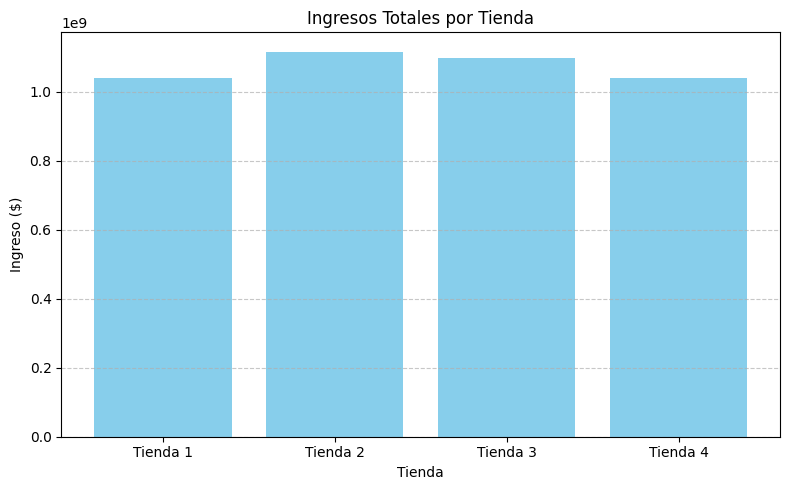

In [15]:
import matplotlib.pyplot as plt

# Ingresos por tienda
ingresos = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, ingresos, color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


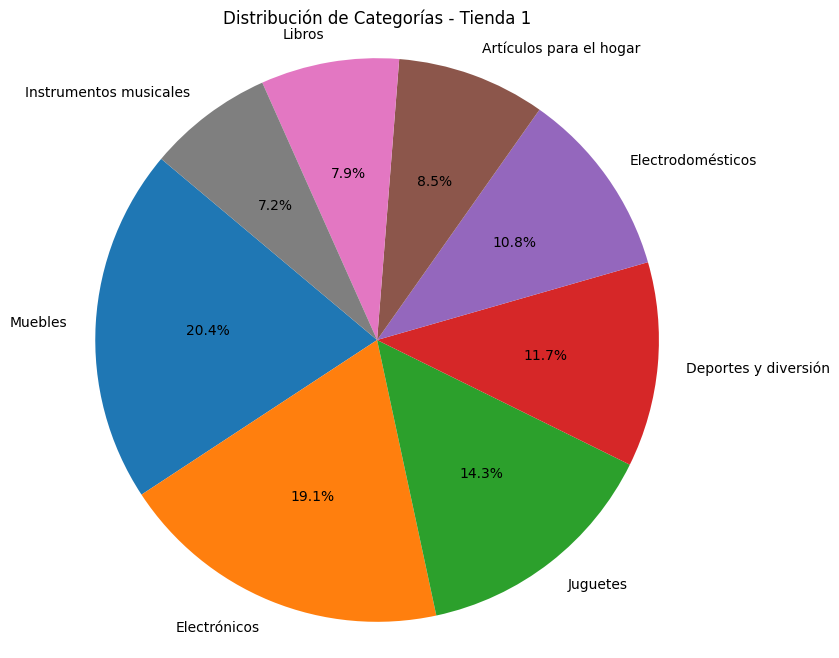

In [16]:
categorias_tienda1 = tienda['Categoría del Producto'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(categorias_tienda1, labels=categorias_tienda1.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Categorías - Tienda 1')
plt.axis('equal')
plt.show()


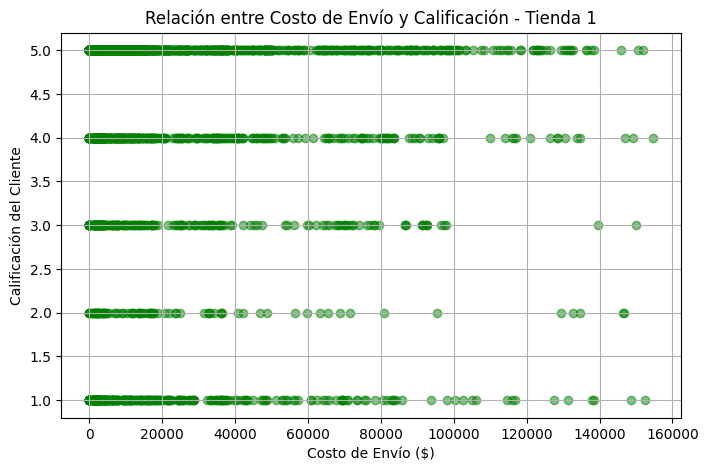

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(tienda['Costo de envío'], tienda['Calificación'], alpha=0.5, color='green')
plt.title('Relación entre Costo de Envío y Calificación - Tienda 1')
plt.xlabel('Costo de Envío ($)')
plt.ylabel('Calificación del Cliente')
plt.grid(True)
plt.show()
